In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\weather_data.csv")
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:48,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:09,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:43,18.999994,63.703245,4.294325,6.326036


In [3]:
# Round data to 2 decimal place where necessary
df['Temperature_C'] = df['Temperature_C'].round(2)
df['Humidity_pct'] = df['Humidity_pct'].round(2)
df['Precipitation_mm'] = df['Precipitation_mm'].round(2)
df['Wind_Speed_kmh'] = df['Wind_Speed_kmh'].round(2)
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.68,41.20,4.02,8.23
1,San Diego,2024-05-17 15:22:10,8.73,58.32,9.11,27.72
2,San Diego,2024-05-11 09:30:59,11.63,38.82,4.61,28.73
3,Philadelphia,2024-02-26 17:32:39,-8.63,54.07,3.18,26.37
4,San Antonio,2024-04-29 13:23:51,39.81,72.90,9.60,29.90
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.42,37.71,3.82,16.54
999996,San Antonio,2024-01-20 15:59:48,6.76,40.73,8.18,29.01
999997,New York,2024-04-14 08:30:09,15.66,62.20,3.99,0.40
999998,Chicago,2024-05-12 20:10:43,19.00,63.70,4.29,6.33


In [4]:
# Check for missing values
print(df.isnull().sum())

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Basic Descriptive Statistics
print(df.describe())

        Temperature_C    Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count  1000000.000000  1000000.000000    1000000.000000  1000000.000000
mean        14.779705       60.021826          5.109639       14.997597
std         14.482559       17.324020          2.947995        8.663558
min        -19.970000       30.000000          0.000000        0.000000
25%          2.270000       45.010000          2.580000        7.490000
50%         14.780000       60.020000          5.110000       14.990000
75%         27.270000       75.040000          7.610000       22.510000
max         40.000000       90.000000         14.970000       30.000000


In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB
None


In [8]:
# Convert Date_Time to datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.68,41.20,4.02,8.23
1,San Diego,2024-05-17 15:22:10,8.73,58.32,9.11,27.72
2,San Diego,2024-05-11 09:30:59,11.63,38.82,4.61,28.73
3,Philadelphia,2024-02-26 17:32:39,-8.63,54.07,3.18,26.37
4,San Antonio,2024-04-29 13:23:51,39.81,72.90,9.60,29.90
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.42,37.71,3.82,16.54
999996,San Antonio,2024-01-20 15:59:48,6.76,40.73,8.18,29.01
999997,New York,2024-04-14 08:30:09,15.66,62.20,3.99,0.40
999998,Chicago,2024-05-12 20:10:43,19.00,63.70,4.29,6.33


# Feature Engineering: Extract Year, Month, Day, Hour from Date_Time

In [9]:
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.strftime('%B')
df['Day'] =df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour
df

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Year,Month,Day,Hour
0,San Diego,2024-01-14 21:12:46,10.68,41.20,4.02,8.23,2024,1,14,21
1,San Diego,2024-05-17 15:22:10,8.73,58.32,9.11,27.72,2024,5,17,15
2,San Diego,2024-05-11 09:30:59,11.63,38.82,4.61,28.73,2024,5,11,9
3,Philadelphia,2024-02-26 17:32:39,-8.63,54.07,3.18,26.37,2024,2,26,17
4,San Antonio,2024-04-29 13:23:51,39.81,72.90,9.60,29.90,2024,4,29,13
...,...,...,...,...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:48,23.42,37.71,3.82,16.54,2024,1,1,20
999996,San Antonio,2024-01-20 15:59:48,6.76,40.73,8.18,29.01,2024,1,20,15
999997,New York,2024-04-14 08:30:09,15.66,62.20,3.99,0.40,2024,4,14,8
999998,Chicago,2024-05-12 20:10:43,19.00,63.70,4.29,6.33,2024,5,12,20


# Use Case 1: Weather Prediction Models
# Predicting Temperature based on other features

In [21]:
# Prepare the data for modeling
features = ['Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Month', 'Day', 'Hour']
X = df[features]
y = df['Temperature_C']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Model Performance:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}")


Model Performance:
MAE: 12.52
MSE: 209.28
RMSE: 14.47


# Prediction Summary
The Mean Absolute Error (MAE) of 12.52 suggests that the model's predictions are, on average, 12.52 degrees Celsius off from 
the actual temperatures, giving a direct understanding of prediction error magnitude.
The Mean Squared Error (MSE) of 209.28 highlights that the model’s errors are substantial, particularly emphasizing on  larger errors more than smaller ones because of the squaring process. Higher MSE indicates a greater disparity between predicted and actual values.
The Root Mean Squared Error (RMSE) of 14.47 means that, on average, the predicted temperature deviates from the actual temperature by about 14.47 degrees Celsius. RMSE is often preferred over MSE because it is in the same units as the target variable, providing a more intuitive measure of error magnitude as seen when compared with the MAE.

Model Performance Evaluation: 
    These values indicate that the model has a relatively high error rate in predicting temperatures. Depending on the specific application and acceptable error margins, these error values might be too high, suggesting that the model may need improvement.    
    In summary, while the model has produced predictions, the significant error values suggest there is considerable room for improvement in making the temperature predictions more accurate.

# Use Case 2: Climate Studies
# Analyzing Temperature Trends over the Year

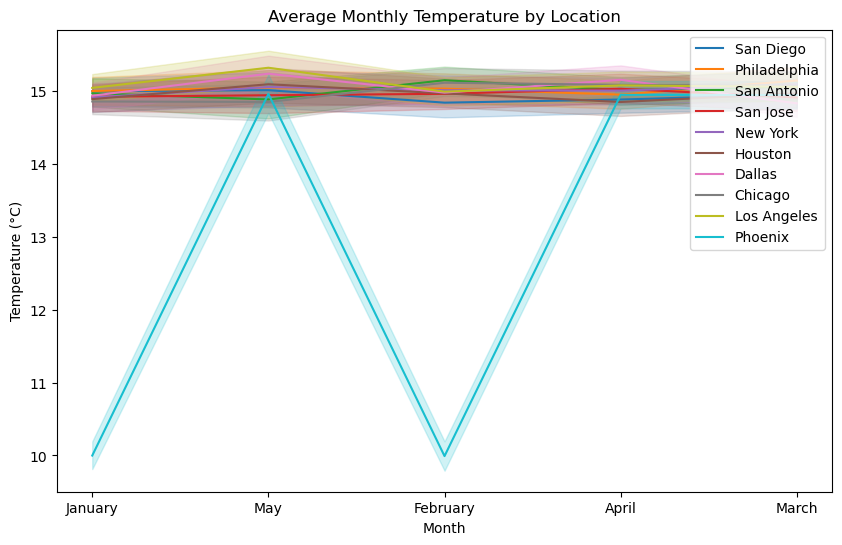

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Temperature_C', hue='Location', estimator='mean')
plt.title('Average Monthly Temperature by Location')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper right')
plt.show()

Most lines appear to be nearly horizontal, suggesting that the average temperature across most locations remains fairly stable across the months depicted.
There is a notable anomaly with the line representing Phoenix.
It shows a significant jump between February and March. 
This could indicate a data entry error, an anomaly in the dataset, or a unique weather event. 
It's important to investigate the data for Phoenix around this period to understand the cause.

# Temperature Over Time in New York

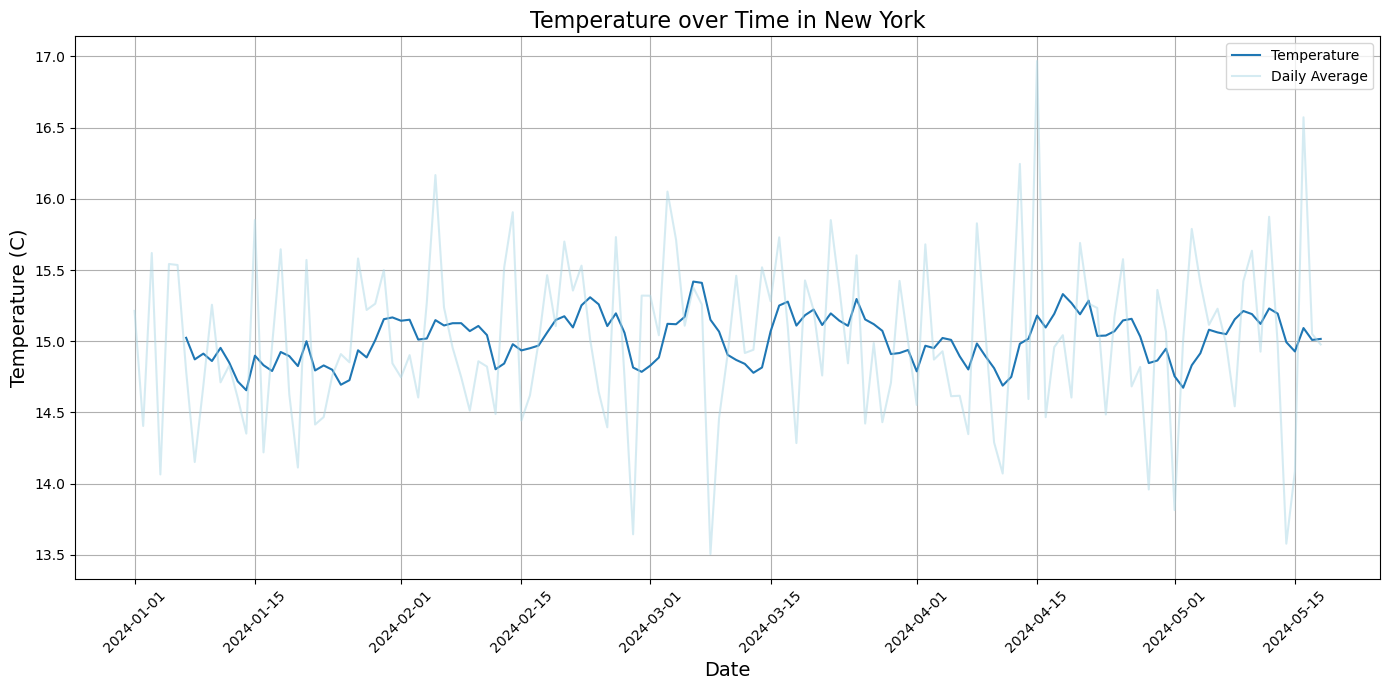

In [14]:
# Filter data for New York and aggregate by day
ny_data = df[df['Location'] == 'New York'].set_index('Date_Time')
ny_data_daily = ny_data['Temperature_C'].resample('D').mean().reset_index()


# Apply a rolling mean to smooth the data (7-day window)
ny_data_daily['Temperature_Smoothed'] = ny_data_daily['Temperature_C'].rolling(window=7).mean()


# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date_Time', y='Temperature_Smoothed', data=ny_data_daily, label='Temperature')
sns.lineplot(x='Date_Time', y='Temperature_C', data=ny_data_daily, color='lightblue', alpha=0.5, label='Daily Average')


plt.title('Temperature over Time in New York', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary
This visualization shows the data period ranging from early January to mid-May.

Trend Line: The darker blue line represents the smoothed temperature trend over time, using a rolling mean. 
This line visualizes the overall trend and seasonal patterns in temperature more clearly by reducing short-term fluctuations.

Daily Average Temperature: The lighter blue line in the background represents the daily average temperatures. 
This line shows the day-to-day variations and highlights the actual recorded temperatures, providing context for the smoothed trend.

Temperature Range: The temperature range depicted is between approximately 13.5°C and 17.0°C. 
This indicates a relatively moderate range.
No extreme temperature spikes are visible in this period, suggesting a relatively stable period without significant weather anomalies.

During this period, the temperature appears to be gradually increasing, which aligns with the transition from winter to spring.

# Focus on precipitation data (replace with chosen feature for EDA)

In [13]:
precipitation_df = df[["Location", "Precipitation_mm"]]

# Calculate summary statistics to understand data distribution
print(precipitation_df.describe(include="all"))  # Include categorical data

       Location  Precipitation_mm
count   1000000    1000000.000000
unique       10               NaN
top     Phoenix               NaN
freq     100209               NaN
mean        NaN          5.109639
std         NaN          2.947997
min         NaN          0.000009
25%         NaN          2.580694
50%         NaN          5.109917
75%         NaN          7.613750
max         NaN         14.971583


# Analyzing Precipitation Patterns: Seasonal variations in New York

C:\Users\HP\AppData\Local\Temp\ipykernel_10036\793434245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['Month'] = ny_data['Date_Time'].dt.strftime('%B')


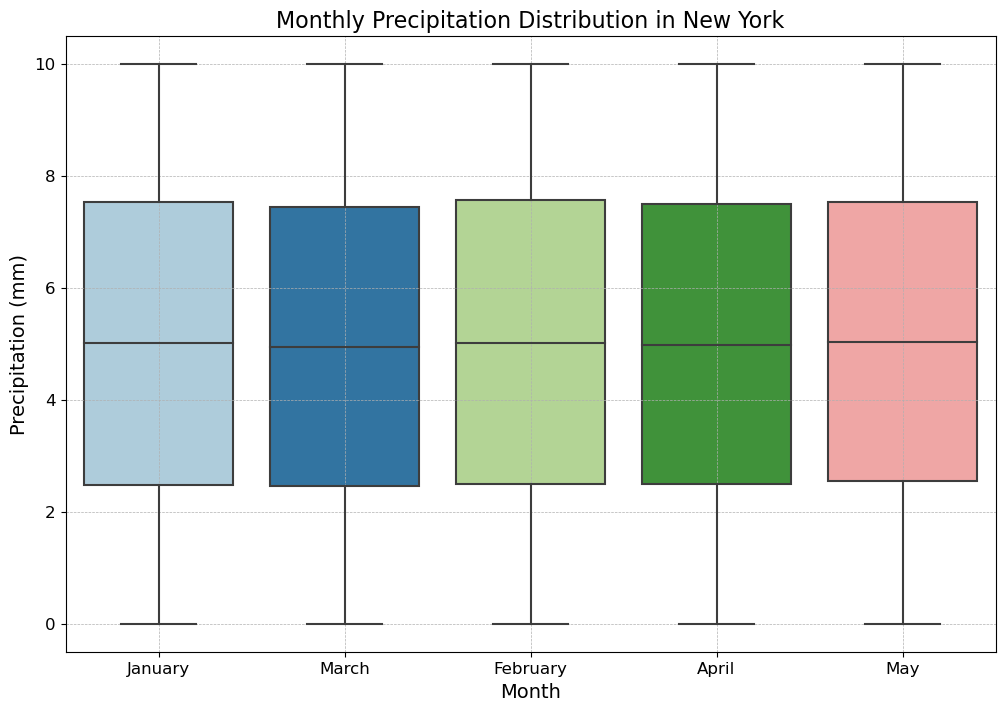

In [18]:
ny_data = df[df['Location'] == 'New York']
ny_data['Month'] = ny_data['Date_Time'].dt.strftime('%B')

plt.figure(figsize=(12, 8))
sns.boxplot(data=ny_data, x='Month', y='Precipitation_mm', palette='Paired')
plt.title('Monthly Precipitation Distribution in New York', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# Analyzing average humidity and precipitation in Phoenix

C:\Users\HP\AppData\Local\Temp\ipykernel_10036\907211461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phx_data['Month'] = phx_data['Date_Time'].dt.month


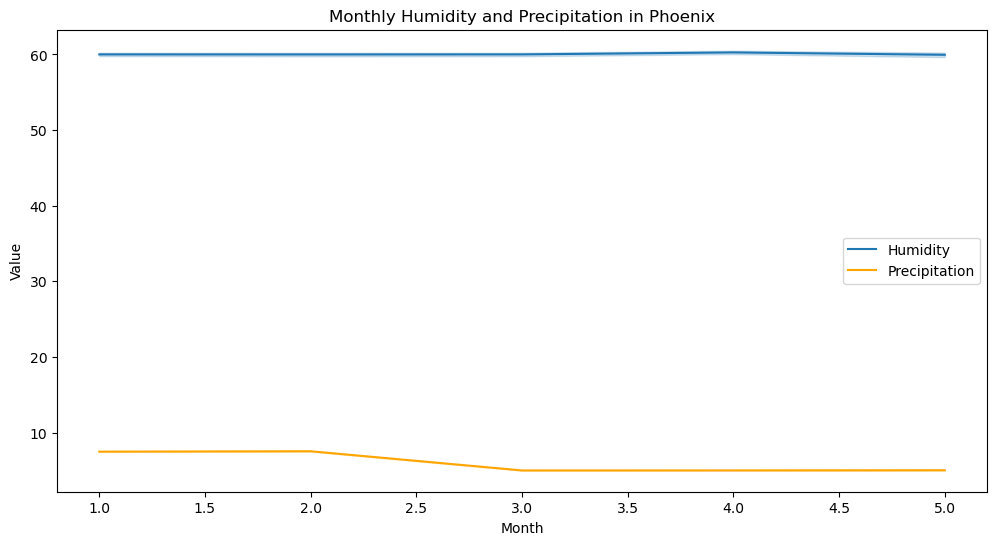

In [21]:
phx_data = df[df['Location'] == 'Phoenix']
phx_data['Month'] = phx_data['Date_Time'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Humidity_pct', data=phx_data, label='Humidity')
sns.lineplot(x='Month', y='Precipitation_mm', data=phx_data, label='Precipitation', color='orange')
plt.title('Monthly Humidity and Precipitation in Phoenix')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

*Humidity:*
The blue line is flat and positioned near the top of the chart, suggesting that the relative humidity in Phoenix is consistently high throughout the year.
The y-axis indicates the humidity percentage, which seems to be around 60%.

*Precipitation:*
The orange line is flat and positioned near the bottom of the chart, indicating that precipitation levels are consistently low throughout the month.
The y-axis indicates precipitation in millimeters, which is near zero, consistent with Phoenix’s arid climate.

# Use Case 3: Correlation Analysis


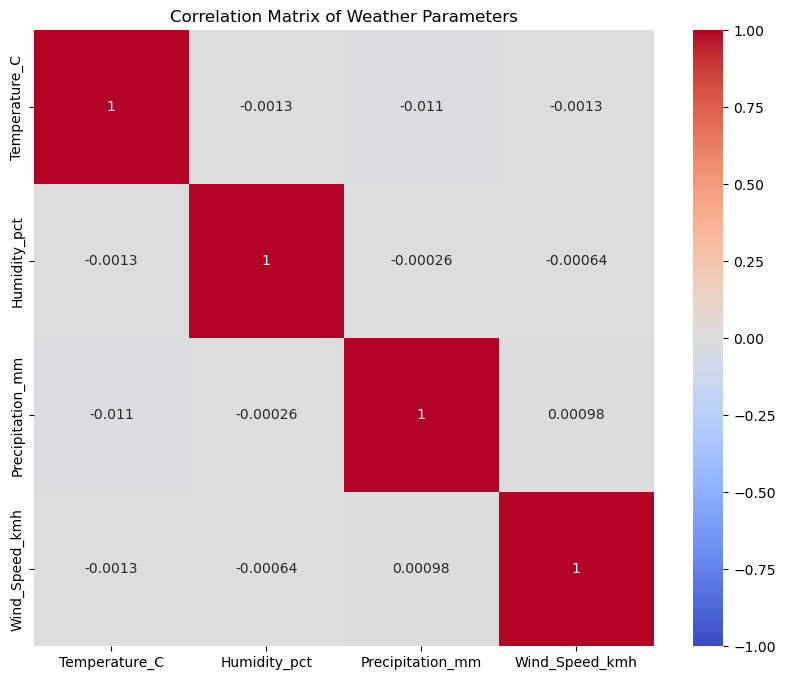

In [36]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

# 1. *Temperature and Other Variables:*
   - The correlation between temperature and other variables appears to be relatively low (close to 0), indicating that temperature might not have a strong linear relationship with these variables.

# 2. *Wind Speed and Precipitation:*
   - The correlation between wind speed and precipitation is positive and might be relatively stronger compared to other pairs, indicating that higher wind speed tends to be associated with higher precipitation.

# 3. *Wind Speed and Other Variables:*
   - Wind speed seems to have a low positive or negative correlation with other variables, indicating weak linear relationships.

# Wind Speed Distribution

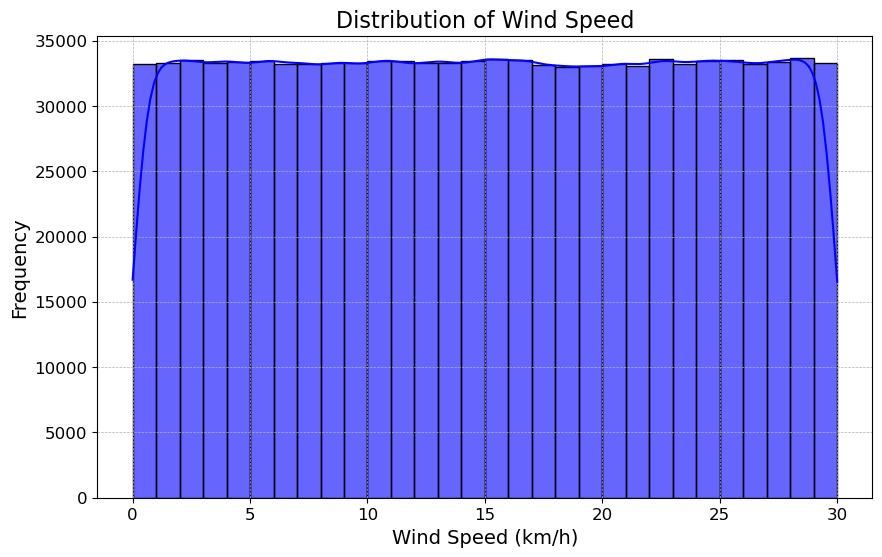

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Wind_Speed_kmh'], kde=True, bins=30, color='blue', alpha=0.6)
plt.title('Distribution of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (km/h)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# 1. *Uniform Distribution:*
   - The histogram bars appear to be evenly distributed across the range of wind speeds, suggesting a uniform distribution.
   - The KDE line is relatively flat, indicating that wind speeds are fairly evenly distributed without a strong peak or mode.

# 2. *Range of Wind Speeds:*
   - The x-axis shows wind speeds ranging from around 0 to 35 km/h.
   - The y-axis values indicate the frequency of wind speed occurrences